In [1]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
length = 1200
output = 24
def generate_sequence(length, period, decay):
    return [sin(2 * pi * output * (i/length)) for i in range(length)]


In [5]:
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss= 'mae' , optimizer= 'adam' )
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1200, 20)          1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 24)                504       
Total params: 5,544
Trainable params: 5,544
Non-trainable params: 0
_________________________________________________________________
None


In [3]:
# generate input and output pairs of sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

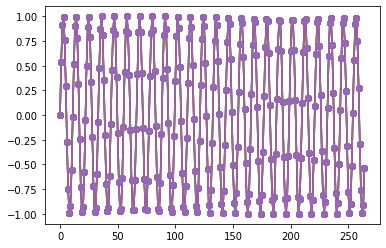

In [4]:
# test problem generation
X, y = generate_examples(260, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o' )
pyplot.show()

In [6]:
# fit model
X, y = generate_examples(length, 1000, output)
history = model.fit(X, y, batch_size=10, epochs=1)

Train on 1000 samples
1000/1000 [==============================] - 162s 162ms/sample - loss: 0.2032


In [7]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print( 'MAE: %f' % loss)


MAE: 0.006058


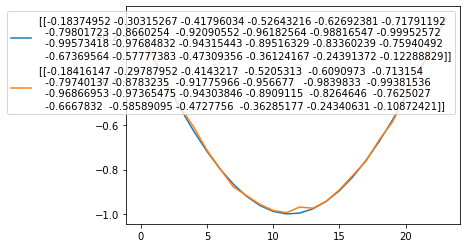

In [8]:
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label= y )
pyplot.plot(yhat[0], label= yhat )
pyplot.legend()
pyplot.show()